In [1]:
import pandas as pd
import numpy as np

male_df = pd.read_csv("C:/Users/JEONGHEE/Desktop/당뇨병플젝/male.csv")
female_df = pd.read_csv("C:/Users/JEONGHEE/Desktop/당뇨병플젝/female.csv")

## 이전에 놓친 범주화 재진행

In [2]:
def preprocess_df(df):
    # BMI 분류 함수
    def classify_bmi_numeric(bmi):
        if bmi < 18.5:
            return 1  # 저체중
        elif bmi < 23:
            return 2  # 정상
        elif bmi < 25:
            return 3  # 과체중
        else:
            return 4  # 비만

    df['BMI_category'] = df['DS1_BMI'].apply(classify_bmi_numeric)
    
    # 저체중 제외
    df = df[df['BMI_category'] != 1]

    # BMI 범주 다시 정리: 2,3,4 → 1,2,3
    df['BMI_category'] = df['BMI_category'].replace({
        2: 1,
        3: 2,
        4: 3
    })

    # 운동 분류
    def classify_exercise(mins):
        if mins == 0:
            return 0
        elif mins < 2.5:
            return 1
        else:
            return 2

    df['exer_category'] = df['total_exer'].apply(classify_exercise)

    # 걷기 총합 계산
    def calc_total_walk(row):
        if row['DS1_WALK'] == 1:
            return 0
        else:
            return row['DS1_WALKFQ'] * row['DS1_WALKT'] / 60

    df['total_walk'] = df.apply(calc_total_walk, axis=1)

    # 걷기 분류
    def classify_walk_minutes(mins):
        if mins == 0:
            return 0
        elif mins < 2.5:
            return 1
        else:
            return 2

    df['walk_category'] = df['total_walk'].apply(classify_walk_minutes)

    return df

In [3]:
# 전처리 적용
male_final = preprocess_df(male_df)
female_final = preprocess_df(female_df)

C:\Users\JEONGHEE\AppData\Local\Temp\ipykernel_7280\3054748318.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BMI_category'] = df['BMI_category'].replace({
C:\Users\JEONGHEE\AppData\Local\Temp\ipykernel_7280\3054748318.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['exer_category'] = df['total_exer'].apply(classify_exercise)
C:\Users\JEONGHEE\AppData\Local\Temp\ipykernel_7280\3054748318.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [4]:
male_final.to_csv("C:/Users/JEONGHEE/Desktop/당뇨병플젝/male_final.csv", index=False)
female_final.to_csv("C:/Users/JEONGHEE/Desktop/당뇨병플젝/female_final.csv", index=False)

In [5]:
print(male_df.columns)
print(female_df.columns)

Index(['DS1_ID', 'DS1_SEX', 'DS1_AGE', 'DS1_HTN', 'DS1_FDM', 'DS1_EXER',
       'DS1_WALK', 'DS1_WALKFQ', 'DS1_WALKT', 'DS1_WAIST', 'DS1_HIP',
       'DS1_PULSE', 'DS1_SBP', 'DS1_DBP', 'DS1_BMI', 'DS1_PBF', 'DS1_BODYFAT',
       'DS1_MUSCLE', 'DS1_VISFAT', 'DS1_WHR', 'DS1_GLU0', 'DS1_HBA1C',
       'target', 'DS1_INCOME_RE', 'DS1_EDU_RE', 'DS1_MARRY_RE', 'total_exer',
       'DS1_SMOKE_RE', 'DS1_DRINK_RE', 'BMI_category'],
      dtype='object')
Index(['DS1_ID', 'DS1_SEX', 'DS1_AGE', 'DS1_HTN', 'DS1_FDM', 'DS1_EXER',
       'DS1_WALK', 'DS1_WALKFQ', 'DS1_WALKT', 'DS1_WAIST', 'DS1_HIP',
       'DS1_PULSE', 'DS1_SBP', 'DS1_DBP', 'DS1_BMI', 'DS1_PBF', 'DS1_BODYFAT',
       'DS1_MUSCLE', 'DS1_VISFAT', 'DS1_WHR', 'DS1_GLU0', 'DS1_HBA1C',
       'target', 'DS1_INCOME_RE', 'DS1_EDU_RE', 'DS1_MARRY_RE', 'total_exer',
       'DS1_SMOKE_RE', 'DS1_DRINK_RE', 'BMI_category'],
      dtype='object')


In [6]:
#### 모델링할 때 변수 범주화변수와 연속형 변수 분리해서 하기 (2가지로 나눠서)

In [7]:
## 연속형 변수(19개)
'DS1_AGE', 'DS1_HTN', 'DS1_FDM',  'DS1_HIP','DS1_PULSE', 'DS1_SBP', 'DS1_DBP', 'DS1_PBF', 'DS1_BMI',
'DS1_MUSCLE', 'DS1_VISFAT', 'DS1_WHR', 'total_exer', 'DS1_INCOME_RE', 'DS1_EDU_RE', 'DS1_MARRY_RE', 'DS1_smoke_RE', 'DS1_drink_RE', 'total_walk'

('DS1_MUSCLE',
 'DS1_VISFAT',
 'DS1_WHR',
 'total_exer',
 'DS1_INCOME_RE',
 'DS1_EDU_RE',
 'DS1_MARRY_RE',
 'DS1_smoke_RE',
 'DS1_drink_RE',
 'total_walk')

In [8]:
## 범주형 변수(19개)
'DS1_AGE', 'DS1_HTN', 'DS1_FDM', 'DS1_HIP','DS1_PULSE', 'DS1_SBP', 'DS1_DBP', 'DS1_PBF', 'DS1_MUSCLE', 'DS1_VISFAT', 
'DS1_WHR', 'exer_category', 'DS1_INCOME_RE', 
'DS1_EDU_RE', 'DS1_MARRY_RE', 'DS1_smoke_RE', 'DS1_drink_RE', 'DS1_BMI_category(BMI_category)', 'walk_category'

('DS1_EDU_RE',
 'DS1_MARRY_RE',
 'DS1_smoke_RE',
 'DS1_drink_RE',
 'DS1_BMI_category(BMI_category)',
 'walk_category')

In [ ]:
# 기본 제거 변수
기본제거변수 : 'DS1_ID','DS1_SEX','DS1_GLU0','DS1_HBA1C’ , ‘DS1_EXER’ 
y값 : ‘target’

# 다중공선성 제거 
'DS1_BODTFAT', ‘DS1_WAIST’

In [ ]:
1. 남자 데이터 : 랜덤포레스트 연속형 변수 
 1-1 다중공선성+ 기본제거 변수 를 제거 한 후 피쳐임포턴스 확인
 1-2 피쳐임포턴스가 0.01 이상인 애들만 가지고 랜덤포레스트 돌리기
 1-3 유든인덱스를 활용한 임계값 구하고 + 하이퍼파라미터 적용 
2. 남자 데이터 : 랜덤포레스트 범주형 변수 
  2-1 다중공선성+ 기본제거 변수 를 제거 한 후 피쳐임포턴스 확인
  2-2 피쳐임포턴스가 0.01 이상인 애들만 가지고 랜덤포레스트 돌리기
  2-3 유든인덱스를 활용한 임계값 구하고 + 하이퍼파라미터 적용 
3. 여자 데이터 : 랜덤포레스트 연속형 변수
  3-1 다중공선성+ 기본제거 변수 를 제거 한 후 피쳐임포턴스 확인
  3-2 피쳐임포턴스가 0.01 이상인 애들만 가지고 랜덤포레스트 돌리기
  3-3 유든인덱스를 활용한 임계값 구하고 + 하이퍼파라미터 적용 
4. 여자 데이터: 랜덤포레스트 범주형 변수 
  4-1 다중공선성+ 기본제거 변수 를 제거 한 후 피쳐임포턴스 확인
  4-2 피쳐임포턴스가 0.01 이상인 애들만 가지고 랜덤포레스트 돌리기
  4-3 유든인덱스를 활용한 임계값 구하고 + 하이퍼파라미터 적용 

# 남자

## 랜덤포레스트 ( 피쳐임포턴스) 

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
male_final_df = pd.read_csv("C:/Users/JEONGHEE/Desktop/당뇨병플젝/male_final.csv")

In [11]:
### 1-1 "기본 제거 + 다중공선성 제거 → 피처임포턴스 확인 (0.01 이상 필터링 전)"

 [1-1] 연속형 변수 - 피처 임포턴스
DS1_BMI          0.10
DS1_MUSCLE       0.09
DS1_PBF          0.09
DS1_HIP          0.09
DS1_SBP          0.08
DS1_PULSE        0.08
DS1_DBP          0.08
DS1_WHR          0.07
DS1_AGE          0.07
DS1_VISFAT       0.07
total_exer       0.05
total_walk       0.04
DS1_EDU_RE       0.02
DS1_INCOME_RE    0.02
DS1_FDM          0.01
DS1_HTN          0.01
DS1_DRINK_RE     0.01
DS1_SMOKE_RE     0.01
DS1_MARRY_RE     0.01
dtype: float64


C:\Users\JEONGHEE\AppData\Local\Temp\ipykernel_7520\146203562.py:39: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\JEONGHEE\AppData\Local\Temp\ipykernel_7520\146203562.py:39: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\JEONGHEE\AppData\Local\Temp\ipykernel_7520\146203562.py:39: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\JEONGHEE\AppData\Local\Temp\ipykernel_7520\146203562.py:39: UserWarning: Glyph 49549 (\N{HANGUL SYLLABLE SOG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\JEONGHEE\AppData\Local\Temp\ipykernel_7520\146203562.py:39: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\JEONGHEE\AppData\Local\Temp\ipykernel_7520\146203562.py:39: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) 

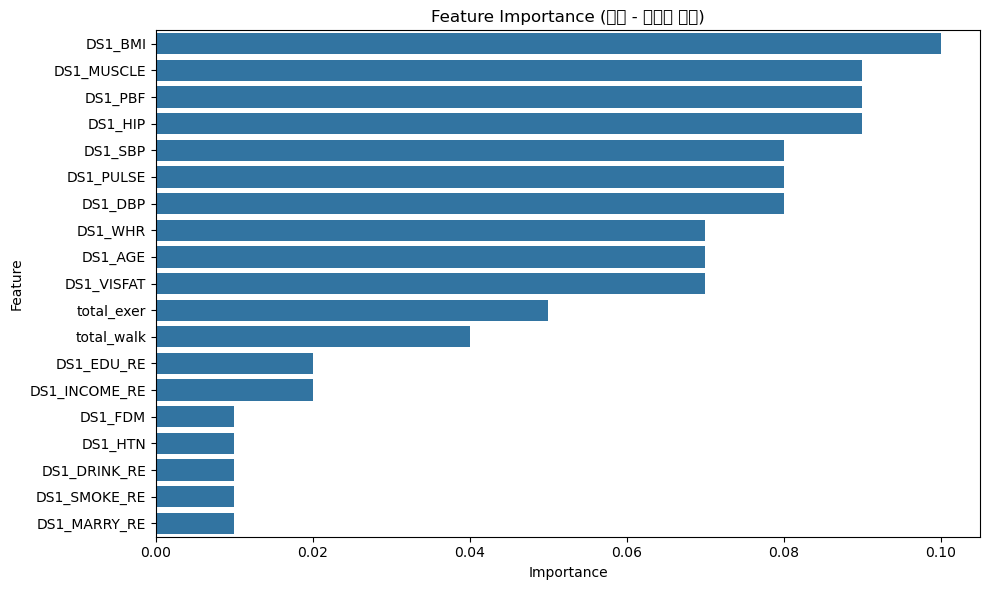

In [3]:
male_final_df = pd.read_csv("C:/Users/JEONGHEE/Desktop/당뇨병플젝/male_final.csv")
continuous_vars = [
    'DS1_AGE', 'DS1_HTN', 'DS1_FDM', 'DS1_HIP','DS1_PULSE', 'DS1_SBP', 'DS1_DBP', 
    'DS1_PBF', 'DS1_BMI','DS1_MUSCLE', 'DS1_VISFAT', 'DS1_WHR', 'total_exer', 
    'DS1_INCOME_RE', 'DS1_EDU_RE', 'DS1_MARRY_RE', 'DS1_SMOKE_RE', 
    'DS1_DRINK_RE', 'total_walk'
]

basic_drop = ['DS1_ID', 'DS1_SEX', 'DS1_GLU0', 'DS1_HBA1C', 'DS1_EXER', 'target']
vif_drop = ['DS1_BODTFAT', 'DS1_WAIST']
drop_list = basic_drop + vif_drop

y = male_final_df['target']
X = male_final_df[continuous_vars].drop(columns=[col for col in drop_list if col in continuous_vars])

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False).round(2)

print(" [1-1] 연속형 변수 - 피처 임포턴스")
print(feature_importances)


plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.values, y=feature_importances.index)
plt.title("Feature Importance (남자 - 연속형 변수)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [13]:
### 1-2 남자 데이터 + 연속형 변수

In [14]:
from sklearn.metrics import classification_report

important_vars = feature_importances[feature_importances >= 0.01].index.tolist()
X_filtered = X[important_vars]

X_train2, X_temp2, y_train2, y_temp2 = train_test_split(X_filtered, y, test_size=0.4, random_state=42, stratify=y)
X_val2, X_test2, y_val2, y_test2 = train_test_split(X_temp2, y_temp2, test_size=0.5, random_state=42, stratify=y_temp2)

rf_filtered = RandomForestClassifier(random_state=42)
rf_filtered.fit(X_train2, y_train2)

y_pred2 = rf_filtered.predict(X_test2)
print("[1-2] 피처임포턴스 ≥ 0.01 변수만 사용한 결과")
print(classification_report(y_test2, y_pred2))

[1-2] 피처임포턴스 ≥ 0.01 변수만 사용한 결과
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      6890
           1       0.00      0.00      0.00       319

    accuracy                           0.96      7209
   macro avg       0.48      0.50      0.49      7209
weighted avg       0.91      0.96      0.93      7209



In [15]:
### 1-3 남자 데이터 + 연속형 변수 + 유든 인덱스 기반 최적 임계값 설정 + 하이퍼파라미터 튜닝한 랜덤포레스트 + AUC

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, classification_report
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 300],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train2, y_train2)

best_model = grid_search.best_estimator_

y_val_proba = best_model.predict_proba(X_val2)[:, 1]

fpr, tpr, thresholds = roc_curve(y_val2, y_val_proba)
youden_index = tpr - fpr

valid_range = (thresholds >= 0.4) & (thresholds <= 0.7)

if valid_range.sum() == 0:
    best_threshold = 0.5  # fallback
    print(" 유효한 threshold 없음 → 기본값 0.5 사용")
else:
    best_threshold = thresholds[valid_range][youden_index[valid_range].argmax()]

best_threshold = thresholds[youden_index.argmax()]
print(f"[1-3] 최적 임계값 (유든 인덱스): {round(best_threshold, 2)}")

val_auc = roc_auc_score(y_val2, y_val_proba)
print(f" [1-3] 검증셋 AUC: {round(val_auc, 3)}")

y_test_proba = best_model.predict_proba(X_test2)[:, 1]
y_test_pred_threshold = (y_test_proba >= best_threshold).astype(int)

print(" [1-3] 테스트셋 결과 (유든 인덱스 기반 threshold 적용)")
print(classification_report(y_test2, y_test_pred_threshold))

 유효한 threshold 없음 → 기본값 0.5 사용
[1-3] 최적 임계값 (유든 인덱스): 0.04
 [1-3] 검증셋 AUC: 0.693
 [1-3] 테스트셋 결과 (유든 인덱스 기반 threshold 적용)
              precision    recall  f1-score   support

           0       0.98      0.54      0.70      6890
           1       0.07      0.75      0.13       319

    accuracy                           0.55      7209
   macro avg       0.52      0.65      0.41      7209
weighted avg       0.94      0.55      0.67      7209



In [17]:
### 1-4 남자 데이터 + 연속형 변수 + 유든 인덱스 + 하이퍼파라미터 튜닝 + K-Fold 적용 + AUC 출력 포함

In [20]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, classification_report

param_grid = {
    'n_estimators': [100, 300],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
    'class_weight': ['balanced']
}

X_train_all, X_test_final, y_train_all, y_test_final = train_test_split(
    X_filtered, y, test_size=0.2, stratify=y, random_state=42
)

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

auc_scores = []
thresholds = []

for train_idx, val_idx in kf.split(X_train_all, y_train_all):
    X_train_k = X_train_all.iloc[train_idx]
    X_val_k = X_train_all.iloc[val_idx]
    y_train_k = y_train_all.iloc[train_idx]
    y_val_k = y_train_all.iloc[val_idx]

    grid_search = GridSearchCV(
        estimator=RandomForestClassifier(random_state=42),
        param_grid=param_grid,
        cv=2,
        scoring='roc_auc',
        n_jobs=-1
    )
    grid_search.fit(X_train_k, y_train_k)
    best_model = grid_search.best_estimator_

    y_val_proba = best_model.predict_proba(X_val_k)[:, 1]
    fpr, tpr, thresholds_all = roc_curve(y_val_k, y_val_proba)
    youden_index = tpr - fpr
    valid_range = (thresholds_all >= 0.4) & (thresholds_all <= 0.7)

    if valid_range.sum() == 0:
        best_threshold = 0.5
        print("Fold에서 유효한 threshold 없음 → 기본값 0.5 사용")
    else:
        best_threshold = thresholds_all[valid_range][youden_index[valid_range].argmax()]

    thresholds.append(best_threshold)
    auc_scores.append(roc_auc_score(y_val_k, y_val_proba))

mean_auc = np.mean(auc_scores)
mean_threshold = np.mean(thresholds)

print("[1-4] 5-Fold 교차검증 AUC 평균:", round(mean_auc, 3))
print("[1-4] 유든 인덱스 기반 평균 임계값 (0.4~0.7 제한):", round(mean_threshold, 2))

final_model = RandomForestClassifier(random_state=42)
final_model.fit(X_train_all, y_train_all)
y_test_proba = final_model.predict_proba(X_test_final)[:, 1]
y_test_pred = (y_test_proba >= mean_threshold).astype(int)

print("[1-4] 테스트셋 결과 (평균 임계값 적용)")
print(classification_report(y_test_final, y_test_pred))

Fold에서 유효한 threshold 없음 → 기본값 0.5 사용
Fold에서 유효한 threshold 없음 → 기본값 0.5 사용
Fold에서 유효한 threshold 없음 → 기본값 0.5 사용
Fold에서 유효한 threshold 없음 → 기본값 0.5 사용
Fold에서 유효한 threshold 없음 → 기본값 0.5 사용
[1-4] 5-Fold 교차검증 AUC 평균: 0.691
[1-4] 유든 인덱스 기반 평균 임계값 (0.4~0.7 제한): 0.5
[1-4] 테스트셋 결과 (평균 임계값 적용)
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      6890
           1       0.00      0.00      0.00       319

    accuracy                           0.96      7209
   macro avg       0.48      0.50      0.49      7209
weighted avg       0.91      0.96      0.93      7209



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, classification_report
from sklearn.model_selection import GridSearchCV, train_test_split

continuous_vars = [
    'DS1_AGE', 'DS1_HTN', 'DS1_FDM', 'DS1_HIP','DS1_PULSE', 'DS1_SBP', 'DS1_DBP', 
    'DS1_PBF', 'DS1_BMI','DS1_MUSCLE', 'DS1_VISFAT', 'DS1_WHR', 'total_exer', 
    'DS1_INCOME_RE', 'DS1_EDU_RE', 'DS1_MARRY_RE', 'DS1_SMOKE_RE', 
    'DS1_DRINK_RE', 'total_walk'
]

X = male_final_df[categorical_vars]
y = male_final_df['target']

X_train2, X_temp2, y_train2, y_temp2 = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)
X_val2, X_test2, y_val2, y_test2 = train_test_split(X_temp2, y_temp2, test_size=0.5, stratify=y_temp2, random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced'] 
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
)
grid_search.fit(X_train2, y_train2)
best_model = grid_search.best_estimator_

# 검증셋 예측
y_val_proba = best_model.predict_proba(X_val2)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val2, y_val_proba)
youden_index = tpr - fpr

valid_range = (thresholds >= 0.4) & (thresholds <= 0.7)
if valid_range.sum() == 0:
    best_threshold = 0.5
    print("[2-3] 유효한 threshold 없음 → 기본값 0.5 사용")
else:
    best_threshold = thresholds[valid_range][youden_index[valid_range].argmax()]

print(f"[2-3] 최적 임계값 (0.4~0.7 제한): {round(best_threshold, 2)}")

val_auc = roc_auc_score(y_val2, y_val_proba)
print(f"[2-3] 검증셋 AUC: {round(val_auc, 3)}")

y_test_proba = best_model.predict_proba(X_test2)[:, 1]
y_test_pred = (y_test_proba >= best_threshold).astype(int)

print("[2-3] 테스트셋 결과 (유든 인덱스 기반 threshold 적용)")
print(classification_report(y_test2, y_test_pred))
print("[2-3] 테스트셋 AUC:", round(roc_auc_score(y_test2, y_test_proba), 3))

[2-3] 최적 임계값 (0.4~0.7 제한): 0.46
[2-3] 검증셋 AUC: 0.69
[2-3] 테스트셋 결과 (유든 인덱스 기반 threshold 적용)
              precision    recall  f1-score   support

           0       0.98      0.56      0.71      6890
           1       0.07      0.71      0.13       319

    accuracy                           0.57      7209
   macro avg       0.52      0.64      0.42      7209
weighted avg       0.94      0.57      0.69      7209

[2-3] 테스트셋 AUC: 0.695


In [ ]:
### 2-1 남자 데이터 + 범주형 변수 + 기본 제거 + 다중공선성 제거 → 피처임포턴스 확인 (0.01 이상 필터링 전)

In [21]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

male_final_df = pd.read_csv("C:/Users/JEONGHEE/Desktop/당뇨병플젝/male_final.csv")
categorical_vars = [
    'DS1_AGE', 'DS1_HTN', 'DS1_FDM', 'DS1_HIP','DS1_PULSE', 'DS1_SBP', 'DS1_DBP',
    'DS1_PBF', 'DS1_MUSCLE', 'DS1_VISFAT', 'DS1_WHR', 'exer_category',
    'DS1_INCOME_RE', 'DS1_EDU_RE', 'DS1_MARRY_RE', 'DS1_SMOKE_RE', 'DS1_DRINK_RE',
    'BMI_category', 'walk_category'
]

basic_drop = ['DS1_ID', 'DS1_SEX', 'DS1_GLU0', 'DS1_HBA1C', 'DS1_EXER', 'target']
vif_drop = ['DS1_BODTFAT', 'DS1_WAIST']
drop_list = basic_drop + vif_drop

y = male_final_df['target']
X = male_final_df[categorical_vars].drop(columns=[col for col in drop_list if col in categorical_vars])
X = X.fillna(0)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)


 [2-1] 범주형 변수 - 피처 임포턴스
DS1_MUSCLE       0.11
DS1_PBF          0.10
DS1_HIP          0.10
DS1_SBP          0.09
DS1_PULSE        0.09
DS1_DBP          0.09
DS1_WHR          0.08
DS1_AGE          0.08
DS1_VISFAT       0.08
DS1_INCOME_RE    0.03
DS1_EDU_RE       0.03
exer_category    0.03
walk_category    0.02
BMI_category     0.02
DS1_HTN          0.01
DS1_FDM          0.01
DS1_SMOKE_RE     0.01
DS1_DRINK_RE     0.01
DS1_MARRY_RE     0.01
dtype: float64


C:\Users\JEONGHEE\AppData\Local\Temp\ipykernel_8404\735053058.py:18: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\JEONGHEE\AppData\Local\Temp\ipykernel_8404\735053058.py:18: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\JEONGHEE\AppData\Local\Temp\ipykernel_8404\735053058.py:18: UserWarning: Glyph 48276 (\N{HANGUL SYLLABLE BEOM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\JEONGHEE\AppData\Local\Temp\ipykernel_8404\735053058.py:18: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\JEONGHEE\AppData\Local\Temp\ipykernel_8404\735053058.py:18: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\JEONGHEE\AppData\Local\Temp\ipykernel_8404\735053058.py:18: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) m

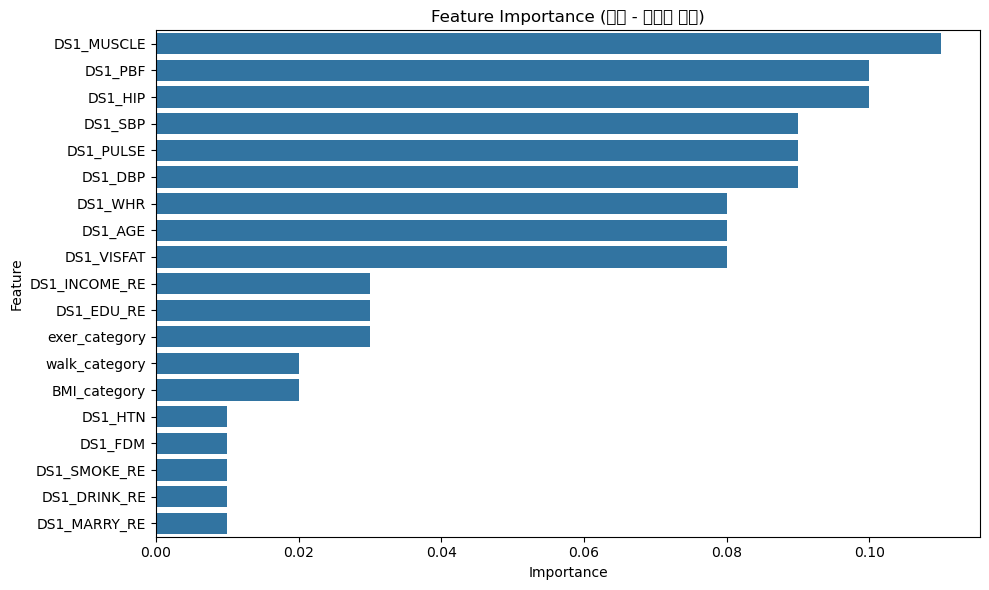

In [22]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False).round(2)

print(" [2-1] 범주형 변수 - 피처 임포턴스")
print(feature_importances)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.values, y=feature_importances.index)
plt.title("Feature Importance (남자 - 범주형 변수)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [23]:
### 2-2 남자 데이터 + 범주형 변수 + 피처임포턴스 ≥ 0.01 변수만 사용한 테스트셋 결과 + AUC 포함"

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score

important_vars = feature_importances[feature_importances >= 0.01].index.tolist()
X_filtered = X[important_vars]

X_train2, X_temp2, y_train2, y_temp2 = train_test_split(X_filtered, y, test_size=0.4, random_state=42, stratify=y)
X_val2, X_test2, y_val2, y_test2 = train_test_split(X_temp2, y_temp2, test_size=0.5, random_state=42, stratify=y_temp2)
rf_filtered = RandomForestClassifier(random_state=42)
rf_filtered.fit(X_train2, y_train2)

y_pred2 = rf_filtered.predict(X_test2)
y_proba2 = rf_filtered.predict_proba(X_test2)[:, 1]

print(" [2-2] 피처임포턴스 ≥ 0.01 변수만 사용한 테스트셋 결과")
print(classification_report(y_test2, y_pred2))
print(" AUC score:", round(roc_auc_score(y_test2, y_proba2), 3))

 [2-2] 피처임포턴스 ≥ 0.01 변수만 사용한 테스트셋 결과
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      6890
           1       0.00      0.00      0.00       319

    accuracy                           0.96      7209
   macro avg       0.48      0.50      0.49      7209
weighted avg       0.91      0.96      0.93      7209

 AUC score: 0.661


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [25]:
### 2-3 남자 데이터 + 범주형 변수 + 유든 인덱스 기반 최적 임계값 설정 + 하이퍼파라미터 튜닝 + AUC 출력

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, classification_report
from sklearn.model_selection import GridSearchCV, train_test_split

categorical_vars = [
    'DS1_AGE', 'DS1_HTN', 'DS1_FDM', 'DS1_HIP', 'DS1_PULSE', 'DS1_SBP', 'DS1_DBP',
    'DS1_PBF', 'DS1_MUSCLE', 'DS1_VISFAT', 'DS1_WHR', 'exer_category',
    'DS1_INCOME_RE', 'DS1_EDU_RE', 'DS1_MARRY_RE', 'DS1_SMOKE_RE', 'DS1_DRINK_RE',
    'BMI_category', 'walk_category'
]

X = male_final_df[categorical_vars]
y = male_final_df['target']

X_train2, X_temp2, y_train2, y_temp2 = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)
X_val2, X_test2, y_val2, y_test2 = train_test_split(X_temp2, y_temp2, test_size=0.5, stratify=y_temp2, random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced'] 
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
)
grid_search.fit(X_train2, y_train2)
best_model = grid_search.best_estimator_

y_val_proba = best_model.predict_proba(X_val2)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val2, y_val_proba)
youden_index = tpr - fpr

valid_range = (thresholds >= 0.4) & (thresholds <= 0.7)
if valid_range.sum() == 0:
    best_threshold = 0.5
    print("[2-3] 유효한 threshold 없음 → 기본값 0.5 사용")
else:
    best_threshold = thresholds[valid_range][youden_index[valid_range].argmax()]

print(f"[2-3] 최적 임계값 (0.4~0.7 제한): {round(best_threshold, 2)}")

val_auc = roc_auc_score(y_val2, y_val_proba)
print(f"[2-3] 검증셋 AUC: {round(val_auc, 3)}")

y_test_proba = best_model.predict_proba(X_test2)[:, 1]
y_test_pred = (y_test_proba >= best_threshold).astype(int)

print("[2-3] 테스트셋 결과 (유든 인덱스 기반 threshold 적용)")
print(classification_report(y_test2, y_test_pred))
print("[2-3] 테스트셋 AUC:", round(roc_auc_score(y_test2, y_test_proba), 3))

[2-3] 최적 임계값 (0.4~0.7 제한): 0.46
[2-3] 검증셋 AUC: 0.69
[2-3] 테스트셋 결과 (유든 인덱스 기반 threshold 적용)
              precision    recall  f1-score   support

           0       0.98      0.56      0.71      6890
           1       0.07      0.71      0.13       319

    accuracy                           0.57      7209
   macro avg       0.52      0.64      0.42      7209
weighted avg       0.94      0.57      0.69      7209

[2-3] 테스트셋 AUC: 0.695


In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, classification_report
from sklearn.model_selection import GridSearchCV, train_test_split

categorical_vars = [
    'DS1_AGE', 'DS1_HTN', 'DS1_FDM', 'DS1_HIP', 'DS1_PULSE', 'DS1_SBP', 'DS1_DBP',
    'DS1_PBF', 'DS1_MUSCLE', 'DS1_VISFAT', 'DS1_WHR', 'exer_category',
    'DS1_INCOME_RE', 'DS1_EDU_RE', 'DS1_MARRY_RE', 'DS1_SMOKE_RE', 'DS1_DRINK_RE',
    'BMI_category', 'walk_category'
]

X = male_final_df[categorical_vars]
y = male_final_df['target']

X_train2, X_temp2, y_train2, y_temp2 = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)
X_val2, X_test2, y_val2, y_test2 = train_test_split(X_temp2, y_temp2, test_size=0.5, stratify=y_temp2, random_state=42)

param_grid = {
    # 'n_estimators': [100, 150],
    # 'max_depth': [5, 10, None],
    # 'min_samples_split': [2, 5],
    # 'min_samples_leaf': [1, 2],
    # 'class_weight': ['balanced'] 

    'n_estimators': [100],
    'max_depth': [3, 5, 7],
    'min_samples_split': [4, 6],
    'min_samples_leaf': [2, 4],
    'class_weight': ['balanced']
}


grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
)
grid_search.fit(X_train2, y_train2)
best_model = grid_search.best_estimator_

y_val_proba = best_model.predict_proba(X_val2)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val2, y_val_proba)
youden_index = tpr - fpr

valid_range = (thresholds >= 0.4) & (thresholds <= 0.7)
if valid_range.sum() == 0:
    best_threshold = 0.5
    print("[2-3] 유효한 threshold 없음 → 기본값 0.5 사용")
else:
    best_threshold = thresholds[valid_range][youden_index[valid_range].argmax()]

print(f"[2-3] 최적 임계값 (0.4~0.7 제한): {round(best_threshold, 2)}")

val_auc = roc_auc_score(y_val2, y_val_proba)
print(f"[2-3] 검증셋 AUC: {round(val_auc, 3)}")

y_test_proba = best_model.predict_proba(X_test2)[:, 1]
y_test_pred = (y_test_proba >= best_threshold).astype(int)

print("[2-3] 테스트셋 결과 (유든 인덱스 기반 threshold 적용)")
print(classification_report(y_test2, y_test_pred))
print("[2-3] 테스트셋 AUC:", round(roc_auc_score(y_test2, y_test_proba), 3))

[2-3] 최적 임계값 (0.4~0.7 제한): 0.46
[2-3] 검증셋 AUC: 0.69
[2-3] 테스트셋 결과 (유든 인덱스 기반 threshold 적용)
              precision    recall  f1-score   support

           0       0.98      0.56      0.71      6890
           1       0.07      0.72      0.13       319

    accuracy                           0.57      7209
   macro avg       0.52      0.64      0.42      7209
weighted avg       0.94      0.57      0.69      7209

[2-3] 테스트셋 AUC: 0.695


## 랜덤포레스트 (rfe 10개 와 15개)

In [38]:
### 3-1. 연속형 변수 – 다중공선성 + 기본제거 변수 제거 후 RFE (10개 / 15개) 출력

In [4]:
import pandas as pd
import numpy as np

male_final_df = pd.read_csv("C:/Users/JEONGHEE/Desktop/당뇨병플젝/male_final.csv")

In [6]:
male_final_df.columns

Index(['DS1_ID', 'DS1_SEX', 'DS1_AGE', 'DS1_HTN', 'DS1_FDM', 'DS1_EXER',
       'DS1_WALK', 'DS1_WALKFQ', 'DS1_WALKT', 'DS1_WAIST', 'DS1_HIP',
       'DS1_PULSE', 'DS1_SBP', 'DS1_DBP', 'DS1_BMI', 'DS1_PBF', 'DS1_BODYFAT',
       'DS1_MUSCLE', 'DS1_VISFAT', 'DS1_WHR', 'DS1_GLU0', 'DS1_HBA1C',
       'target', 'DS1_INCOME_RE', 'DS1_EDU_RE', 'DS1_MARRY_RE', 'total_exer',
       'DS1_SMOKE_RE', 'DS1_DRINK_RE', 'BMI_category', 'exer_category',
       'total_walk', 'walk_category'],
      dtype='object')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
import pandas as pd

male_final_df = pd.read_csv("C:/Users/JEONGHEE/Desktop/당뇨병플젝/male_final.csv")

continuous_vars_filtered = [
    'DS1_AGE', 'DS1_HTN', 'DS1_FDM', 'DS1_HIP', 'DS1_PULSE', 'DS1_SBP',
    'DS1_DBP', 'DS1_PBF', 'DS1_BMI', 'DS1_MUSCLE', 'DS1_VISFAT', 'DS1_WHR',
    'total_exer', 'DS1_INCOME_RE', 'DS1_EDU_RE', 'DS1_MARRY_RE',
    'DS1_SMOKE_RE', 'DS1_DRINK_RE', 'total_walk'
]

X = male_final_df[continuous_vars_filtered]
y = male_final_df['target']


def rfe_results(X, y, n_features):
    model = RandomForestClassifier(random_state=42)
    selector = RFE(estimator=model, n_features_to_select=n_features)
    selector.fit(X, y)

    result_df = pd.DataFrame({
        'Feature': X.columns,
        'Selected': selector.support_,
        'Ranking': selector.ranking_
    }).sort_values('Ranking').reset_index(drop=True)

    selected = result_df[result_df['Selected'] == True]['Feature'].tolist()
    removed = result_df[result_df['Selected'] == False]['Feature'].tolist()

    return result_df, selected, removed

rfe10_df, rfe_10_selected, rfe_10_removed = rfe_results(X, y, 10)
print("[3-1] RFE 10개 선택된 변수:")
print(rfe_10_selected)
print("\n[3-1] RFE 10개 제거된 변수:")
print(rfe_10_removed)

rfe15_df, rfe_15_selected, rfe_15_removed = rfe_results(X, y, 15)
print("\n[3-1] RFE 15개 선택된 변수:")
print(rfe_15_selected)
print("\n[3-1] RFE 15개 제거된 변수:")
print(rfe_15_removed)

In [ ]:
### [3-2] RFE 10개 연속형 변수로 랜덤포레스트 학습 (기본 설정, 하이퍼파라미터 & CV 없이)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report

X_rfe10 = male_final_df[rfe_10_selected]
y = male_final_df['target']

X_train, X_temp, y_train, y_temp = train_test_split(X_rfe10, y, test_size=0.4, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

model_basic = RandomForestClassifier(random_state=42)
model_basic.fit(X_train, y_train)

y_test_proba = model_basic.predict_proba(X_test)[:, 1]
y_test_pred = model_basic.predict(X_test)

print("[3-2]  기본 RandomForestClassifier 결과 (RFE 10개 변수)")
print(" AUC:", round(roc_auc_score(y_test, y_test_proba), 3))
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

In [ ]:
### [3-3] RFE 10개 유든 인덱스 기반 threshold 설정 + 하이퍼파라미터 튜닝 + 테스트셋 평가

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np

X_rfe10 = male_final_df[rfe_10_selected]
y = male_final_df['target']

X_train, X_temp, y_train, y_temp = train_test_split(X_rfe10, y, test_size=0.4, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced']
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1
)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

y_val_proba = best_model.predict_proba(X_val)[:, 1]

fpr, tpr, thresholds = roc_curve(y_val, y_val_proba)
youden_index = tpr - fpr
valid_range = (thresholds >= 0.4) & (thresholds <= 0.7)
if valid_range.sum() == 0:
    best_threshold = 0.5
    print("[3-3] 유효한 threshold 없음 → 기본값 0.5 사용")
else:
    best_threshold = thresholds[valid_range][youden_index[valid_range].argmax()]
print(f"[3-3] 최적 임계값 (Youden 기준): {round(best_threshold, 2)}")

# 테스트셋 평가
y_test_proba = best_model.predict_proba(X_test)[:, 1]
y_test_pred = (y_test_proba >= best_threshold).astype(int)

print("[3-3] 테스트셋 평가 결과 (유든 인덱스 기반 threshold 적용)")
print(" AUC:", round(roc_auc_score(y_test, y_test_proba), 3))
print(" Classification Report:")
print(classification_report(y_test, y_test_pred))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np

# RFE 10개 변수 기준 데이터셋 구성
X_rfe10 = male_final_df[rfe_10_selected]
y = male_final_df['target']

# 데이터 분할 (6:2:2)
X_train, X_temp, y_train, y_temp = train_test_split(X_rfe10, y, test_size=0.4, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# 하이퍼파라미터 튜닝 (class_weight 반드시 포함)
param_grid = {
    # 'n_estimators': [100, 150],
    # 'max_depth': [5, 10, None],
    # 'min_samples_split': [2, 5],
    # 'min_samples_leaf': [1, 2],
    # 'class_weight': ['balanced']

    # 'n_estimators': [100, 200],
    # 'max_depth': [5, 10, None],
    # 'min_samples_split': [2, 5],
    # 'min_samples_leaf': [1, 2],
    # 'class_weight': ['balanced']


    'n_estimators': [100],
    'max_depth': [3, 5, 7],
    'min_samples_split': [4, 6],
    'min_samples_leaf': [2, 4],
    'class_weight': ['balanced']
    
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1
)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# 검증셋 확률 예측
y_val_proba = best_model.predict_proba(X_val)[:, 1]

# 유든 인덱스 계산 (0.4 ~ 0.7 범위 제한)
fpr, tpr, thresholds = roc_curve(y_val, y_val_proba)
youden_index = tpr - fpr
valid_range = (thresholds >= 0.4) & (thresholds <= 0.7)
if valid_range.sum() == 0:
    best_threshold = 0.5
    print("[3-3] 유효한 threshold 없음 → 기본값 0.5 사용")
else:
    best_threshold = thresholds[valid_range][youden_index[valid_range].argmax()]
print(f"[3-3] ✅ 최적 임계값 (Youden 기준): {round(best_threshold, 2)}")

# 테스트셋 평가
y_test_proba = best_model.predict_proba(X_test)[:, 1]
y_test_pred = (y_test_proba >= best_threshold).astype(int)

print("[3-3] 테스트셋 평가 결과 (유든 인덱스 기반 threshold 적용)")
print(" AUC:", round(roc_auc_score(y_test, y_test_proba), 3))
print(" Classification Report:")
print(classification_report(y_test, y_test_pred))

In [ ]:
### [3-4] RFE 15개 연속형 변수로 기본 RandomForest 학습 + 테스트셋 평가 (하이퍼파라미터 X)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report

X_rfe15 = male_final_df[rfe_15_selected]
y = male_final_df['target']

X_train, X_temp, y_train, y_temp = train_test_split(X_rfe15, y, test_size=0.4, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

model_basic_15 = RandomForestClassifier(random_state=42)
model_basic_15.fit(X_train, y_train)

y_test_proba = model_basic_15.predict_proba(X_test)[:, 1]
y_test_pred = model_basic_15.predict(X_test)

print("[3-4] 기본 RandomForest (RFE 15개 변수)")
print(" AUC:", round(roc_auc_score(y_test, y_test_proba), 3))
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

In [59]:
#### [3-5] RFE 15개 + 하이퍼파라미터 튜닝 + 기본 threshold 평가 + cv=5

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, classification_report

# RFE 15개 변수 기준 데이터 구성
X_rfe15 = male_final_df[rfe_15_selected]
y = male_final_df['target']

X_train, X_temp, y_train, y_temp = train_test_split(X_rfe15, y, test_size=0.4, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)


param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced']
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1
)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# 테스트셋 평가 (threshold = 0.5 기본)
y_test_proba = best_model.predict_proba(X_test)[:, 1]
y_test_pred = best_model.predict(X_test)

print("[3-5]  RFE 15개 + 튜닝된 모델 평가 (기본 threshold)")
print(" AUC:", round(roc_auc_score(y_test, y_test_proba), 3))
print(" Classification Report:")
print(classification_report(y_test, y_test_pred))

[3-5]  RFE 15개 + 튜닝된 모델 평가 (기본 threshold)
 AUC: 0.688
 Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.67      0.79      6890
           1       0.08      0.61      0.14       319

    accuracy                           0.66      7209
   macro avg       0.53      0.64      0.46      7209
weighted avg       0.93      0.66      0.76      7209



In [ ]:
###  [3-6] 연속형 RFE 15개 + 전체 통합 평가 모델

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, classification_report, roc_curve
import numpy as np

X = male_final_df[rfe_15_selected]
y = male_final_df['target']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced']

    # 'n_estimators': [100, 200],
    # 'max_depth': [5, 10, None],
    # 'min_samples_split': [2, 5],
    # 'min_samples_leaf': [1, 2],
    # 'class_weight': ['balanced']


    # 'n_estimators': [100],
    # 'max_depth': [3, 5, 7],
    # 'min_samples_split': [4, 6],
    # 'min_samples_leaf': [2, 4],
    # 'class_weight': ['balanced']
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1
)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

y_val_proba = best_model.predict_proba(X_val)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_val_proba)
youden_index = tpr - fpr
valid_range = (thresholds >= 0.4) & (thresholds <= 0.7)
best_threshold = thresholds[valid_range][youden_index[valid_range].argmax()] if valid_range.any() else 0.5

y_test_proba = best_model.predict_proba(X_test)[:, 1]
y_test_pred = (y_test_proba >= best_threshold).astype(int)

print("[3-6] 연속형 RFE 15개 | 최종 종합 평가 모델")
print(" 최적 threshold (유든 인덱스):", round(best_threshold, 2))
print("AUC:", round(roc_auc_score(y_test, y_test_proba), 3))
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

[3-6] 연속형 RFE 15개 | 최종 종합 평가 모델
 최적 threshold (유든 인덱스): 0.44
AUC: 0.688
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.53      0.68      6890
           1       0.07      0.76      0.13       319

    accuracy                           0.54      7209
   macro avg       0.52      0.64      0.41      7209
weighted avg       0.94      0.54      0.66      7209



In [ ]:
------> 두가지 안해봄

In [64]:
### [4-1] 범주형 변수 – 다중공선성 + 기본제거 반영 → RFE (10개 & 15개) 결과 출력

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
import pandas as pd

male_final_df = pd.read_csv("C:/Users/JEONGHEE/Desktop/당뇨병플젝/male_final.csv")
categorical_vars_filtered = [
    'DS1_AGE', 'DS1_HTN', 'DS1_FDM', 'DS1_HIP', 'DS1_PULSE', 'DS1_SBP', 'DS1_DBP',
    'DS1_PBF', 'DS1_MUSCLE', 'DS1_VISFAT', 'DS1_WHR', 'exer_category',
    'DS1_INCOME_RE', 'DS1_EDU_RE', 'DS1_MARRY_RE', 'DS1_SMOKE_RE', 'DS1_DRINK_RE',
    'BMI_category', 'walk_category'
]

X = male_final_df[categorical_vars_filtered]
y = male_final_df['target']

def rfe_results(X, y, n_features):
    model = RandomForestClassifier(random_state=42)
    selector = RFE(estimator=model, n_features_to_select=n_features)
    selector.fit(X, y)
    result_df = pd.DataFrame({
        'Feature': X.columns,
        'Selected': selector.support_,
        'Ranking': selector.ranking_
    }).sort_values('Ranking').reset_index(drop=True)

    selected = result_df[result_df['Selected']]['Feature'].tolist()
    removed = result_df[~result_df['Selected']]['Feature'].tolist()
    return result_df, selected, removed

rfe10_df, rfe_10_selected_cat, rfe_10_removed_cat = rfe_results(X, y, 10)
print("[4-1] RFE 10개 선택된 범주형 변수:")
print(rfe_10_selected_cat)
print("\n[4-1] RFE 10개 제거된 변수:")
print(rfe_10_removed_cat)

rfe15_df, rfe_15_selected_cat, rfe_15_removed_cat = rfe_results(X, y, 15)
print("\n[4-1] RFE 15개 선택된 범주형 변수:")
print(rfe_15_selected_cat)
print("\n[4-1] RFE 15개 제거된 변수:")
print(rfe_15_removed_cat)

[4-1] RFE 10개 선택된 범주형 변수:
['DS1_AGE', 'DS1_EDU_RE', 'DS1_WHR', 'DS1_MUSCLE', 'DS1_PBF', 'DS1_DBP', 'DS1_VISFAT', 'DS1_PULSE', 'DS1_HIP', 'DS1_SBP']

[4-1] RFE 10개 제거된 변수:
['DS1_INCOME_RE', 'exer_category', 'walk_category', 'BMI_category', 'DS1_SMOKE_RE', 'DS1_DRINK_RE', 'DS1_HTN', 'DS1_FDM', 'DS1_MARRY_RE']

[4-1] RFE 15개 선택된 범주형 변수:
['DS1_AGE', 'DS1_SMOKE_RE', 'DS1_EDU_RE', 'DS1_INCOME_RE', 'exer_category', 'DS1_WHR', 'BMI_category', 'DS1_MUSCLE', 'DS1_VISFAT', 'DS1_DBP', 'DS1_SBP', 'DS1_PULSE', 'DS1_HIP', 'DS1_PBF', 'walk_category']

[4-1] RFE 15개 제거된 변수:
['DS1_DRINK_RE', 'DS1_HTN', 'DS1_FDM', 'DS1_MARRY_RE']


In [ ]:
###  [4-2] RFE 10개 범주형 변수 기반 RandomForest (기본 설정, 하이퍼파라미터 없음)

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report

X_cat10 = male_final_df[rfe_10_selected_cat]
y = male_final_df['target']

X_train, X_temp, y_train, y_temp = train_test_split(X_cat10, y, test_size=0.4, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

model_basic_cat10 = RandomForestClassifier(random_state=42)
model_basic_cat10.fit(X_train, y_train)

y_test_proba = model_basic_cat10.predict_proba(X_test)[:, 1]
y_test_pred = model_basic_cat10.predict(X_test)

print("[4-2] RFE 10개 범주형 변수 기반 기본 모델 평가")
print(" AUC:", round(roc_auc_score(y_test, y_test_proba), 3))
print(" Classification Report:")
print(classification_report(y_test, y_test_pred))

[4-2] RFE 10개 범주형 변수 기반 기본 모델 평가
 AUC: 0.63
 Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      6890
           1       0.00      0.00      0.00       319

    accuracy                           0.96      7209
   macro avg       0.48      0.50      0.49      7209
weighted avg       0.91      0.96      0.93      7209



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
### [4-3] 범주형 RFE 10개 변수 기준 + 하이퍼파라미터 튜닝 (class_weight 포함) + 유든 인덱스 기반 threshold 적용 + 최종 테스트셋 평가 (AUC + classification_report)

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score, classification_report
import numpy as np

X_cat10 = male_final_df[rfe_10_selected_cat]
y = male_final_df['target']

X_train, X_temp, y_train, y_temp = train_test_split(X_cat10, y, test_size=0.4, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

param_grid = {
    # 'n_estimators': [100, 150],
    # 'max_depth': [5, 10, None],
    # 'min_samples_split': [2, 5],
    # 'min_samples_leaf': [1, 2],
    # 'class_weight': ['balanced']
    
    # 'n_estimators': [100, 200],
    # 'max_depth': [5, 10, None],
    # 'min_samples_split': [2, 5],
    # 'min_samples_leaf': [1, 2],
    # 'class_weight': ['balanced']


    'n_estimators': [100],
    'max_depth': [3, 5, 7],
    'min_samples_split': [4, 6],
    'min_samples_leaf': [2, 4],
    'class_weight': ['balanced']
    
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1
)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

y_val_proba = best_model.predict_proba(X_val)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_val_proba)
youden_index = tpr - fpr

valid_range = (thresholds >= 0.4) & (thresholds <= 0.7)
best_threshold = thresholds[valid_range][youden_index[valid_range].argmax()] if valid_range.any() else 0.5
print(f"[4-3] 최적 threshold (Youden Index 기준): {round(best_threshold, 2)}")

y_test_proba = best_model.predict_proba(X_test)[:, 1]
y_test_pred = (y_test_proba >= best_threshold).astype(int)

print("[4-3] 최종 테스트셋 평가 결과 (RFE 10개 범주형 + 튜닝 + 유든)")
print("AUC:", round(roc_auc_score(y_test, y_test_proba), 3))
print(" Classification Report:")
print(classification_report(y_test, y_test_pred))

[4-3] 최적 threshold (Youden Index 기준): 0.45
[4-3] 최종 테스트셋 평가 결과 (RFE 10개 범주형 + 튜닝 + 유든)
AUC: 0.686
 Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.55      0.70      6890
           1       0.07      0.73      0.13       319

    accuracy                           0.56      7209
   macro avg       0.52      0.64      0.42      7209
weighted avg       0.94      0.56      0.68      7209



In [71]:
### 4-4 RFE 15개 범주형 변수 기반 RandomForest (하이퍼파라미터 튜닝 없이)

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report

X_cat15 = male_final_df[rfe_15_selected_cat]
y = male_final_df['target']

X_train, X_temp, y_train, y_temp = train_test_split(X_cat15, y, test_size=0.4, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

model_basic_cat15 = RandomForestClassifier(random_state=42)
model_basic_cat15.fit(X_train, y_train)

y_test_proba = model_basic_cat15.predict_proba(X_test)[:, 1]
y_test_pred = model_basic_cat15.predict(X_test)

print("[4-4] 기본 모델 평가 (RFE 15개 범주형 변수)")
print(" AUC:", round(roc_auc_score(y_test, y_test_proba), 3))
print(" Classification Report:")
print(classification_report(y_test, y_test_pred))

[4-4] 기본 모델 평가 (RFE 15개 범주형 변수)
 AUC: 0.618
 Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      6890
           1       0.00      0.00      0.00       319

    accuracy                           0.96      7209
   macro avg       0.48      0.50      0.49      7209
weighted avg       0.91      0.96      0.93      7209



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
### [4-5] RFE 15개 범주형 변수 + 하이퍼파라미터 튜닝 + 유든 인덱스 기반 평가

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score, classification_report
import numpy as np

X_cat15 = male_final_df[rfe_15_selected_cat]
y = male_final_df['target']

X_train, X_temp, y_train, y_temp = train_test_split(X_cat15, y, test_size=0.4, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

param_grid = {
    # 'n_estimators': [100, 150],
    # 'max_depth': [5, 10, None],
    # 'min_samples_split': [2, 5],
    # 'min_samples_leaf': [1, 2],
    # 'class_weight': ['balanced']
    
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced']


    # 'n_estimators': [100],
    # 'max_depth': [3, 5, 7],
    # 'min_samples_split': [4, 6],
    # 'min_samples_leaf': [2, 4],
    # 'class_weight': ['balanced']
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1
)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

y_val_proba = best_model.predict_proba(X_val)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_val_proba)
youden_index = tpr - fpr
valid_range = (thresholds >= 0.4) & (thresholds <= 0.7)
best_threshold = thresholds[valid_range][youden_index[valid_range].argmax()] if valid_range.any() else 0.5
print(f"[4-5] 최적 threshold (Youden 기준): {round(best_threshold, 2)}")

y_test_proba = best_model.predict_proba(X_test)[:, 1]
y_test_pred = (y_test_proba >= best_threshold).astype(int)

print("[4-5] 최종 테스트셋 평가 결과 (범주형 RFE 15개 + 튜닝 + 유든)")
print("AUC:", round(roc_auc_score(y_test, y_test_proba), 3))
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

[4-5] 최적 threshold (Youden 기준): 0.46
[4-5] 최종 테스트셋 평가 결과 (범주형 RFE 15개 + 튜닝 + 유든)
AUC: 0.685
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.55      0.70      6890
           1       0.07      0.72      0.13       319

    accuracy                           0.56      7209
   macro avg       0.52      0.64      0.42      7209
weighted avg       0.94      0.56      0.68      7209



In [ ]:
### K-Fold 제거	높음	데이터 불균형 + 분할 방식에 따라 성능이 요동칠 수 있음 → 검증 신뢰도 ↓
### [4-6] K-Fold 유지 + 하이퍼파라미터 튜닝 제거

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, classification_report
import numpy as np

X_cat15 = male_final_df[rfe_15_selected_cat]
y = male_final_df['target']

X_train, X_temp, y_train, y_temp = train_test_split(X_cat15, y, test_size=0.4, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)
y_val_proba = model.predict_proba(X_val)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_val_proba)
youden_index = tpr - fpr
valid_range = (thresholds >= 0.4) & (thresholds <= 0.7)
best_threshold = thresholds[valid_range][youden_index[valid_range].argmax()] if valid_range.any() else 0.5
print(f"[4-6] 최적 threshold (Youden 기준): {round(best_threshold, 2)}")

y_test_proba = model.predict_proba(X_test)[:, 1]
y_test_pred = (y_test_proba >= best_threshold).astype(int)

print("[4-6] 테스트셋 평가 (K-Fold 유지 / 튜닝 없음 / 유든 적용)")
print("AUC:", round(roc_auc_score(y_test, y_test_proba), 3))
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

[4-6] 최적 threshold (Youden 기준): 0.5
[4-6] 테스트셋 평가 (K-Fold 유지 / 튜닝 없음 / 유든 적용)
AUC: 0.63
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      6890
           1       0.00      0.00      0.00       319

    accuracy                           0.96      7209
   macro avg       0.48      0.50      0.49      7209
weighted avg       0.91      0.96      0.93      7209



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
